## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tqdm.notebook import tqdm
from IPython.display import clear_output
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
from NN import *#



In [2]:
# Load dataset

X,Y=load_all_and_preproc()
Y = one_hot(10,Y)
X, Y, X_val, Y_val = create_val_set(X,Y)



# Test
X_test,Y_test,filenames_test = LoadBatch('test_batch')
Y_test = one_hot(10,Y_test)
X_test=preprocess(X_test)

print(X.shape,Y.shape, X_val.shape, Y_val.shape, X_test.shape,Y_test.shape)

(3072, 45000) (10, 45000) (3072, 5000) (10, 5000) (3072, 10000) (10, 10000)


In [2]:
X,Y,_ = LoadBatch('data_batch_1')
X=preprocess(X)
Y = one_hot(10,Y)

if False:
    w=25
    h=4
    X_visualize = X_train.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    visualize_multiple_images(X_visualize,h,w,True)
    
    
X_val,Y_val, _ = LoadBatch('data_batch_2')
X_val=preprocess(X_val)
Y_val = one_hot(10, Y_val)

X_test,Y_test, _ = LoadBatch('test_batch')
X_test=preprocess(X_test)
Y_test = one_hot(10, Y_test)

print(X.shape,Y.shape, X_val.shape, Y_val.shape, X_test.shape,Y_test.shape)

(3072, 10000) (10, 10000) (3072, 10000) (10, 10000) (3072, 10000) (10, 10000)


# 1) Batch normalization

## CHECKING GRADIENTS

### 2-Layer NN

In [70]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 20

## Network
nn = Network()
nn.add(Dense(50, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dropout()), nn.add(Dense(n_hidden, n_out)), nn.add(BatchNorm(n_out))


MIKEL


In [71]:
test_gradients(nn,X[:50,:1200],Y[:,:1200],0.1)

LAYER: 1
Sum of relative weights error for Layer FC : 3.944821589696126e-05
Sum of relative betas error for Layer BN: : 1.3023404895502955e-06
Sum of relative gammas error for Layer BN: : 1.4865756627917995e-06

LAYER: 2
Sum of relative weights error for Layer FC : 1.1198939659489972e-05
Sum of relative betas error for Layer BN: : 5.122448109095137e-07
Sum of relative gammas error for Layer BN: : 4.8064612437545407e-08



### 3-Layer NN

In [76]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 20

## Network
nn = Network()
nn.add(Dropout(0.45)), nn.add(Dense(50, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dropout(0.47)),nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dropout(0.5)), nn.add(Dense(n_hidden, n_out)), nn.add(BatchNorm(n_out))


(None, None, None)

In [77]:
test_gradients(nn,X[:50,:1200],Y[:,:1200],0.1)

LAYER: 1
Sum of relative weights error for Layer FC : 6.744223197558246e-05
Sum of relative betas error for Layer BN: : 1.538899770183416e-05
Sum of relative gammas error for Layer BN: : 6.406194743380783e-06

LAYER: 2
Sum of relative weights error for Layer FC : 1.617455774860262e-05
Sum of relative betas error for Layer BN: : 2.3069954638303776e-06
Sum of relative gammas error for Layer BN: : 1.1353008175350312e-06

LAYER: 3
Sum of relative weights error for Layer FC : 7.4935070153727835e-06
Sum of relative betas error for Layer BN: : 1.1938581646222671e-05
Sum of relative gammas error for Layer BN: : 4.9213730578717414e-08



# Training

In [6]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*6
print(n_epochs)

## Network
nn = Network()
nn.add(Dropout(0.3)), nn.add(Dense(n_in, 100)), nn.add(ReLU()), nn.add(BatchNorm(100))
nn.add(Dense(100, 50)), nn.add(ReLU()), nn.add(BatchNorm(50))
nn.add(Dropout(0.3)), nn.add(Dense(50, 100)), nn.add(ReLU()), nn.add(BatchNorm(100))
nn.add(Dropout(0.2)), nn.add(Dense(100, n_out))



60


(None, None)

Epoch 64
Train accuracy: 0.6767555555555556 Train loss: 0.9235
Val accuracy: 0.5628 Val loss: 1.2612 



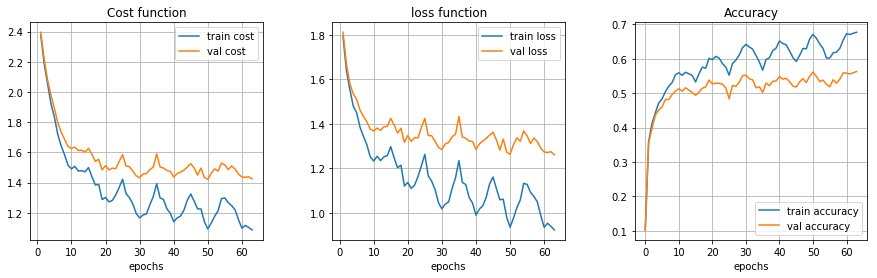


Train set accuracy: 0.6767555555555556
Validation set accuracy: 0.5628
Test set accuracy: 0.5523


In [8]:
#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=3, eta=1e-7,retrain=False, reg = 0.001164, visualize=True, n_batch=n_batch,
         eta_min=None, eta_max=1e-1,n_s=n_s, augment = True)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

### Baseline

Epoch 51
Train accuracy: 0.6151111111111112 Train loss: 1.0867
Val accuracy: 0.5328 Val loss: 1.3303 



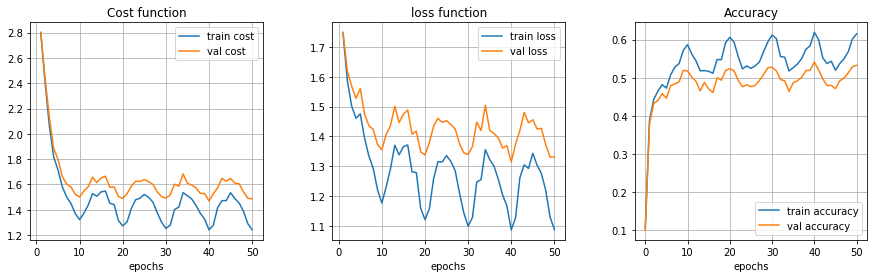


Train set accuracy: 0.6151111111111112
Validation set accuracy: 0.5328
Test set accuracy: 0.5279


In [4]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*5
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))


#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005164, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

### Augmentation

Epoch 71
Train accuracy: 0.6223111111111111 Train loss: 1.0678
Val accuracy: 0.5414 Val loss: 1.3004 



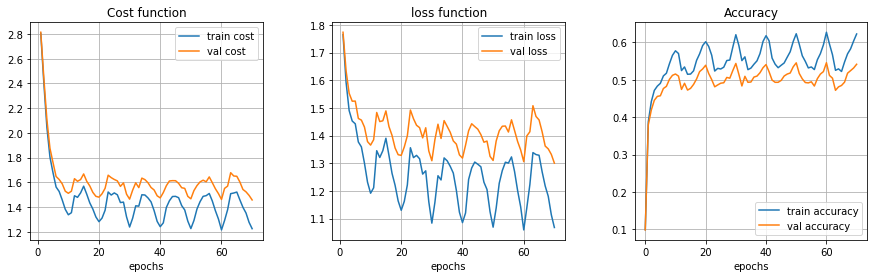


Train set accuracy: 0.6223111111111111
Validation set accuracy: 0.5414
Test set accuracy: 0.5265


In [3]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*7
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))


#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs,retrain=False, eta=0.01, reg = 0.005164, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = True)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

### BN afte ReLu

Epoch 70
Train accuracy: 0.6326222222222222 Train loss: 1.0415
Val accuracy: 0.5492 Val loss: 1.3173 



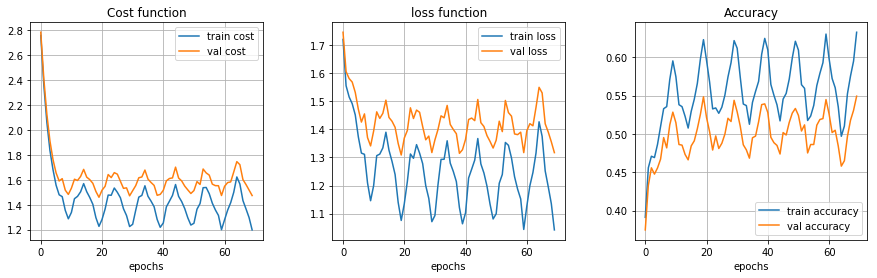


Train set accuracy: 0.6326222222222222
Validation set accuracy: 0.5492
Test set accuracy: 0.5376


In [6]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*7
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(ReLU()), nn.add(BatchNorm(n_hidden))
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU()), nn.add(BatchNorm(n_hidden))
nn.add(Dense(n_hidden, n_out))


#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005164, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

### Dropout

In [ ]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*8
print(n_epochs)

## Network
nn = Network()
nn.add(Dropout(0.3)), nn.add(Dense(n_in, n_hidden)), nn.add(ReLU()), nn.add(BatchNorm(n_hidden))
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU()), nn.add(BatchNorm(n_hidden))
nn.add(Dropout(0.3)), nn.add(Dense(n_hidden, n_out))


#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs,retrain=False, eta=0.01, reg = 0.005164, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=10**-1.5,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

80
51


In [1]:
n_in, n = X.shape
n_batch=100
n_s = 5*n/n_batch
# n_epochs = int(2*n_s*n_batch/n)*8
# n_epochs
n_s

NameError: name 'X' is not defined